In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:

# read csv file
data = pd.read_csv('C:/Users/hp/Desktop/week1/data/raw_analyst_ratings.csv')

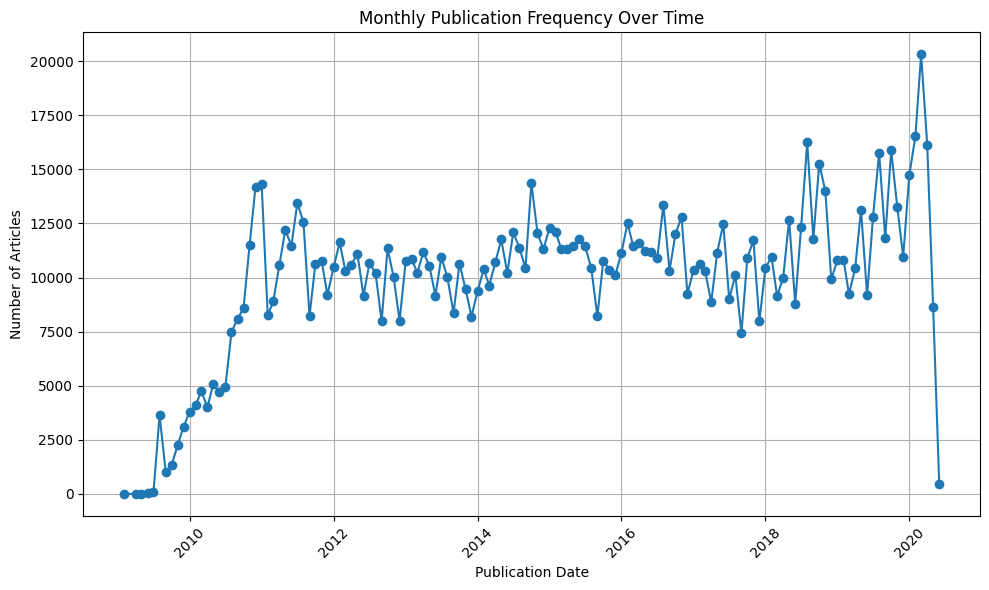

In [58]:

# Convert publication date to datetime format
data["publication_date"] = pd.to_datetime(data["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Extract year and month
data["year_month"] = data["publication_date"].dt.to_period('M')

# Group data by year_month and count the number of articles
publication_frequency = data.groupby('year_month').size().reset_index(name='article_count')

# Convert year_month to datetime format for plotting
publication_frequency['year_month'] = publication_frequency['year_month'].dt.to_timestamp()

# Plot the publication frequency over time
plt.figure(figsize=(10, 6))
plt.plot(publication_frequency['year_month'], publication_frequency['article_count'], marker='o')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.title('Monthly Publication Frequency Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


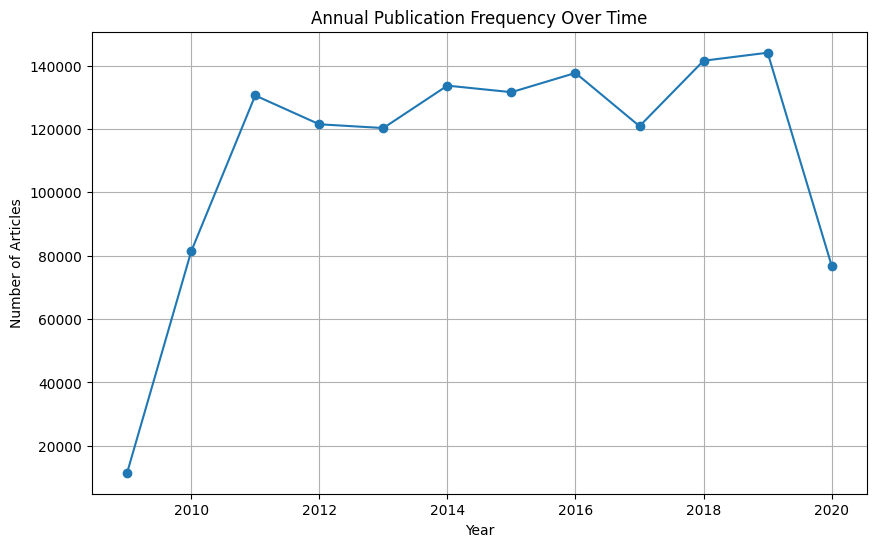

In [27]:
# Convert publication date to datetime format
data["publication_date"] = pd.to_datetime(data["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Extract year
data["year"] = data["publication_date"].dt.year

# Group data by year and count the number of articles
publication_frequency = data.groupby('year').size().reset_index(name='article_count')

# Plot the publication frequency over time
plt.figure(figsize=(10, 6))
plt.plot(publication_frequency['year'], publication_frequency['article_count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Annual Publication Frequency Over Time')
plt.grid(True)
plt.show()


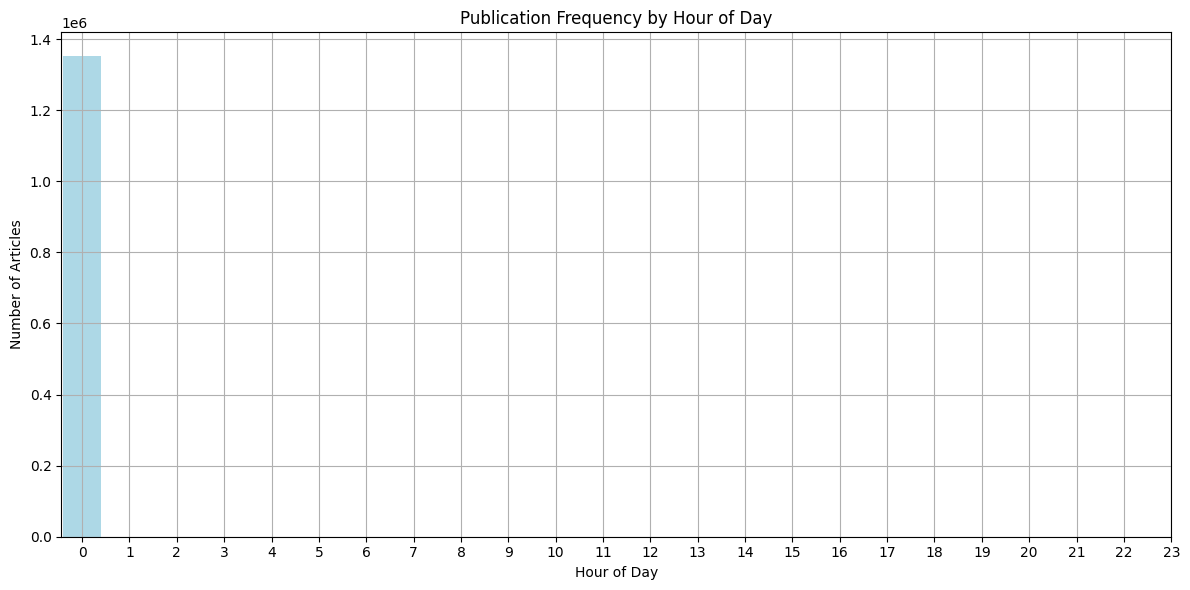

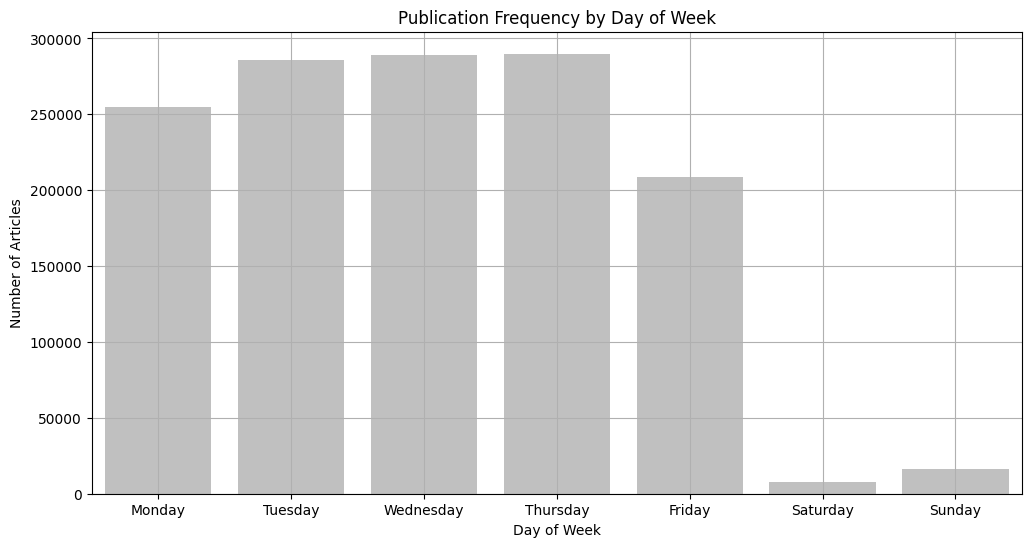

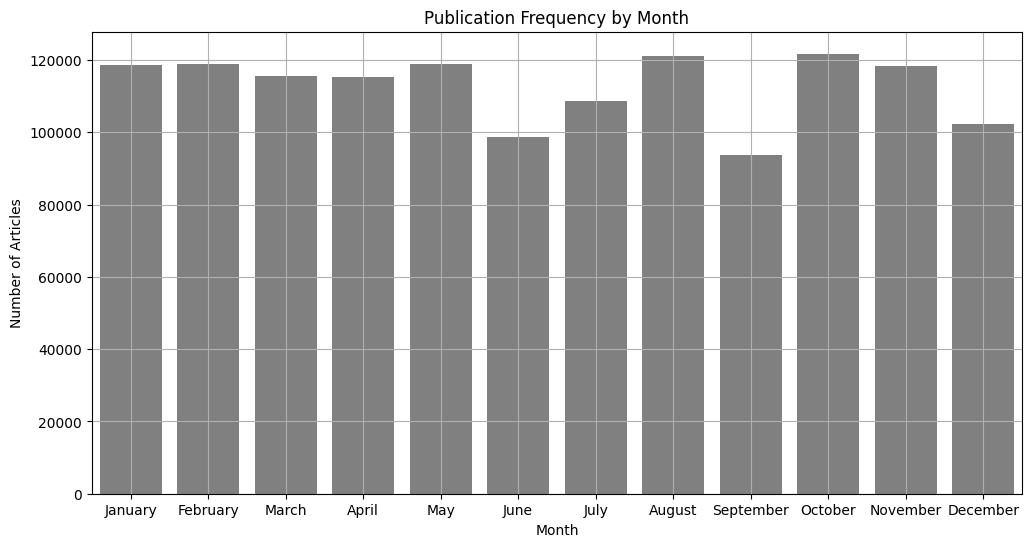

In [59]:
# Convert publication date to datetime format
data["publication_date"] = pd.to_datetime(data["date"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Drop rows where publication_date could not be converted
data = data.dropna(subset=["publication_date"])

# Extract time components
data["hour"] = data["publication_date"].dt.hour
data["day_of_week"] = data["publication_date"].dt.day_name()
data["month"] = data["publication_date"].dt.month_name()

# Analyze publication frequency by hour of the day
hourly_counts = data.groupby("hour").size().reindex(range(24)).reset_index(name='article_count')
#publication_frequency = data.groupby('publication_hour').size().reset_index(name='article_count')


# Analyze publication frequency by day of the week
daily_counts = data.groupby("day_of_week").size().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index(name='article_count')

# Analyze publication frequency by month
monthly_counts = data.groupby("month").size().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]).reset_index(name='article_count')

# Plot hourly publication frequency
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts["hour"], hourly_counts["article_count"], color='lightblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency by Hour of Day')
plt.xticks(range(24))  # Ensure all hours are shown
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot daily publication frequency
plt.figure(figsize=(12, 6))
sns.barplot(x="day_of_week", y="article_count", data=daily_counts, color='silver')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency by Day of Week')
plt.grid(True)
plt.show()

# Plot monthly publication frequency
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="article_count", data=monthly_counts, color="gray")
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency by Month')
plt.grid(True)
plt.show()
